# Importing Libraries

In [1]:
library(tidyverse) # metapackage of all tidyverse packages
library(caret)
# library(dplyr)
library(mlbench)
library(data.table)

# list.files(path = "../input")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




# Dataset

In [2]:
train <- read.csv('../input/titanic/train.csv')
test <- read.csv('../input/titanic/test.csv')
train_fread <- fread('../input/titanic/train.csv')

In [3]:
head(train,4)
head(train_fread, 4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S


In [4]:
summary(train)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

In [5]:
colnames(train)

[1] "PassengerId" "Survived"    "Pclass"      "Name"        "Sex"        
 [6] "Age"         "SibSp"       "Parch"       "Ticket"      "Fare"       
[11] "Cabin"       "Embarked"

# NA values and fix

In [6]:
colSums(is.na(train))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [7]:
train_for_age <- train[-which(is.na(train$Age)),]
test_for_age <- train[which(is.na(train$Age)),]

In [8]:
print(paste("Number of rows with non null values: ", dim(train_for_age)[1]))
print(paste("Number of rows with null value : ", dim(test_for_age)[1]))

[1] "Number of rows with non null values:  714"
[1] "Number of rows with null value :  177"


In [9]:
relation  <- lm(Age~Sex+Survived+Pclass+SibSp+Parch+Fare+Embarked, data=train_for_age)
preds = predict(relation, test_for_age)
test_for_age$Age <- as.integer(preds)
train <- rbind(train_for_age, test_for_age)

# EDA

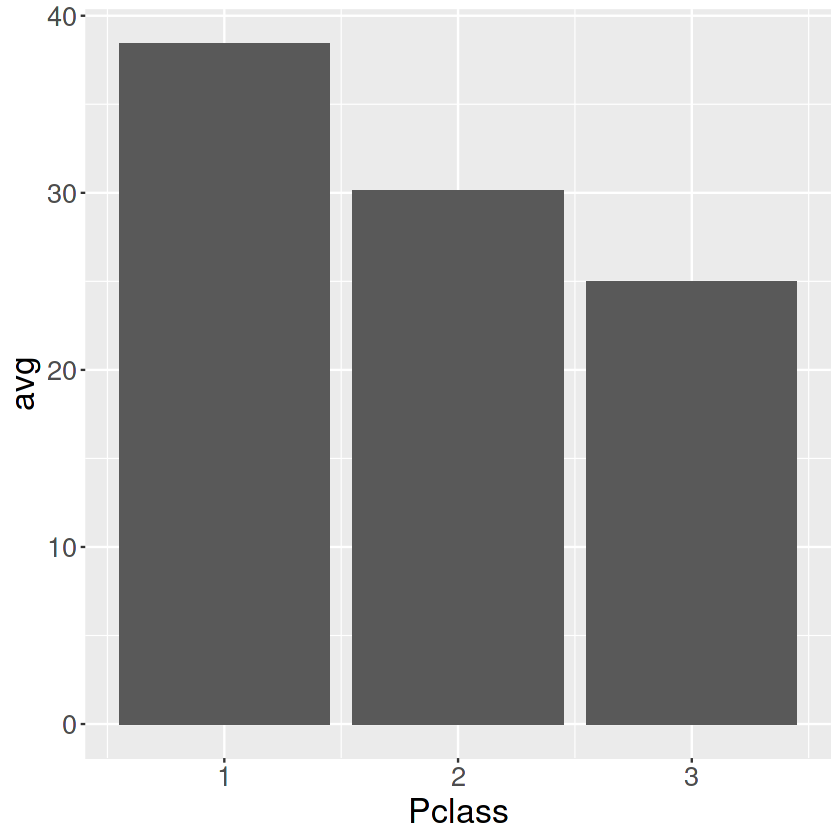

In [10]:
z <- train %>%
    group_by(Pclass)%>%
        summarise(avg=mean(Age))

ggplot(z,
       aes(Pclass, y=avg))+
        geom_col()+
        theme(text=element_text(size=20))

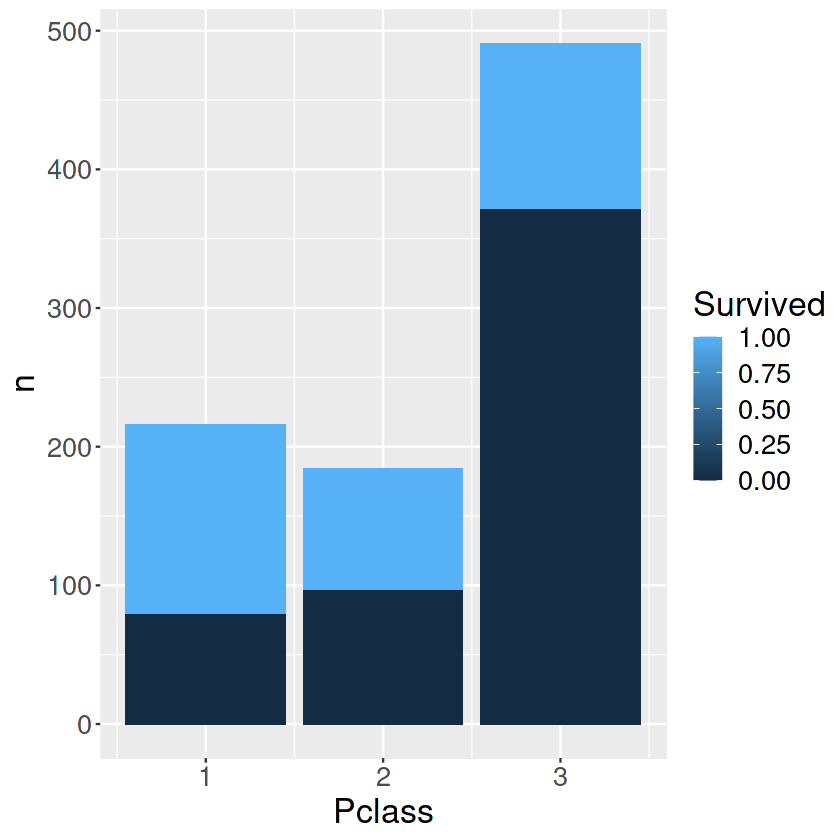

In [11]:
zz <- train %>%
        group_by(Pclass)%>%
        count(Survived)
#         summarise(avg=mean(Age))

ggplot(train %>%
        group_by(Pclass)%>%
        count(Survived),
        aes(Pclass, y=n, fill=Survived))+
        geom_col()+
        theme(text=element_text(size=20))

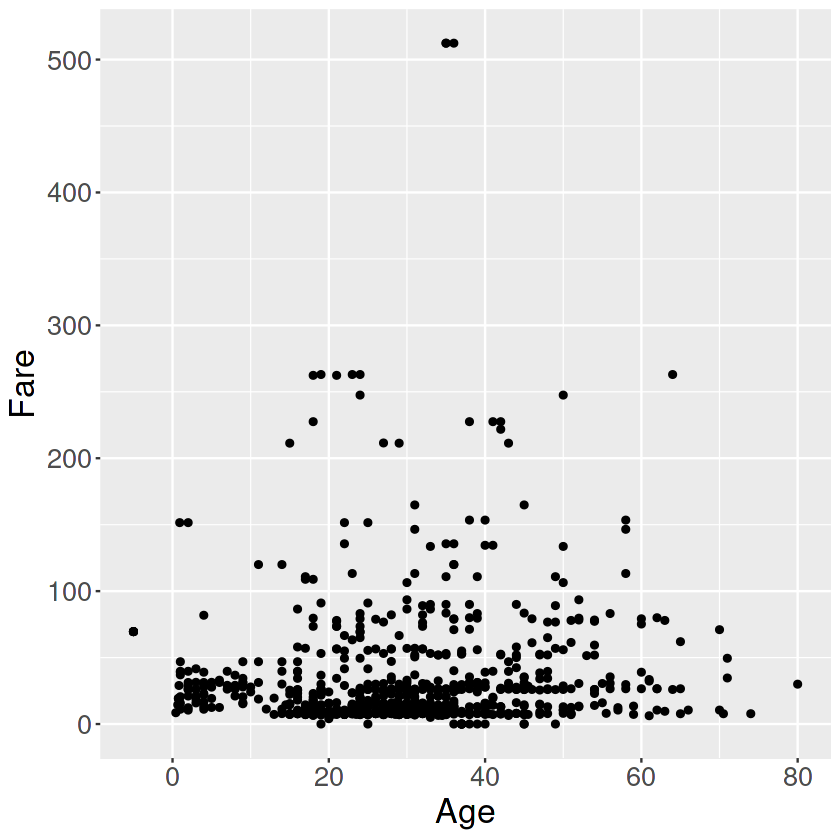

In [12]:
ggplot(train, 
        aes(x=Age, y=Fare)) +
        geom_point()+
        theme(text=element_text(size=20))

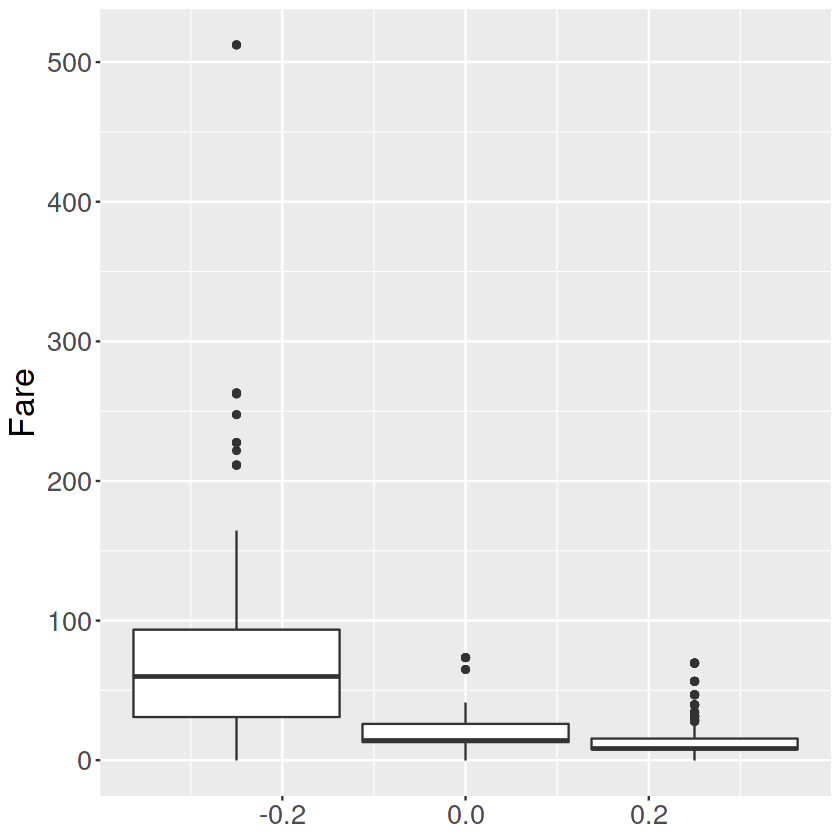

In [13]:
ggplot(train%>%
    group_by(Pclass),
#         summarise(avg=mean(Fare), med=median(Fare)),
        aes(group=Pclass, y=Fare))+
        geom_boxplot()+
        theme(text=element_text(size=20))

# Feature Engineering

In [14]:
train = mutate(train, family = SibSp + Parch)

# train$Survived <- factor(train$Survived)
# train$Sex <- as.numeric(factor(train$Sex))

# train$Pclass <- factor(train$Pclass)
# train$SibSp <- factor(train$SibSp)
# train$Parch <- factor(train$Parch)
# train$Embarked <- factor(train$Embarked)
# train$Cabin <- factor(train$Cabin)
# train$Ticket <- factor(train$Ticket)

In [15]:
head(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,1
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,0
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,0
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0


In [16]:
get_title <- function(train){
    tr1 <- strsplit(train$Name, ",")
    tr1 <- as.data.table(transpose(tr1))
    train[,c("Surname", "FN")] <- tr1

    tr2 <- strsplit(train$FN, "[.]")
    tr2 <- as.data.table(transpose(tr2))
    train[,c("Title", "FullName","Extra")] <- tr2
    train$Title <- as.integer(factor(train$Title))
    
    cat_cols <- c("Survived", "Sex", "Pclass", "SibSp", "Parch", "Embarked", "Cabin", "Ticket")
    train[cat_cols] <- lapply(train[cat_cols], factor)
    library('fastDummies')
    dum1 <- dummy_cols(train,select_columns =c('Sex', 'Pclass', 'Embarked'))
    drops <- c("Name", "Cabin", "Sex", "Pclass", "PassengerId", "Ticket", "Embarked", "FullName","Extra", "Surname", "FN")
    train_df <- dum1[ , !(names(dum1) %in% drops)]
    
    return(train_df)
}

zz <- get_title(train)

In [17]:
# zz

In [18]:
tr1 <- strsplit(train$Name, ",")
tr1 <- as.data.table(transpose(tr1))
train[,c("Surname", "FN")] <- tr1

tr2 <- strsplit(train$FN, "[.]")
tr2 <- as.data.table(transpose(tr2))
train[,c("Title", "FullName","Extra")] <- tr2

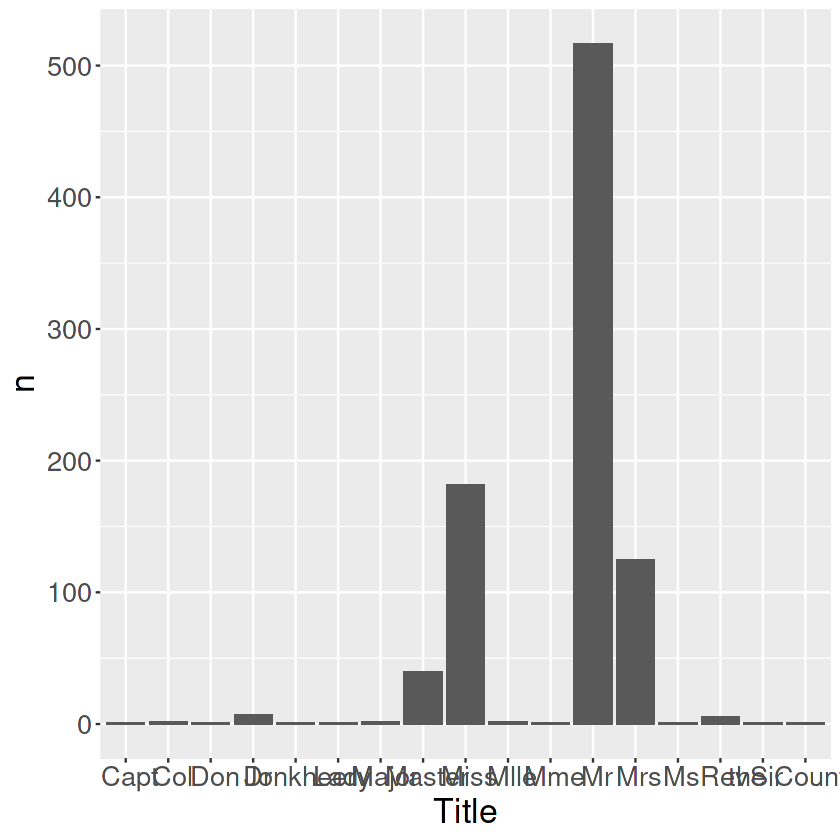

In [19]:
# options(repr.plot.width = 1, repr.plot.height = 0.75)
P <- ggplot(train%>%
        group_by(Title)%>%
        count(),
        aes(Title, y=n))+
            geom_col()+
            theme(text=element_text(size=20))
# options(repr.P.width=20,repr.P.height=30)
P

In [20]:
train$Title <- as.integer(factor(train$Title))

In [21]:
cat_cols <- c("Survived", "Sex", "Pclass", "SibSp", "Parch", "Embarked", "Cabin", "Ticket")
train[cat_cols] <- lapply(train[cat_cols], factor)
library('fastDummies')
dum1 <- dummy_cols(train,select_columns =c('Sex', 'Pclass', 'Embarked'))
drops <- c("Name", "Cabin", "Sex", "Pclass", "PassengerId", "Ticket", "Embarked", "FullName","Extra", "Surname", "FN", "Embarked_")
train_df <- dum1[ , !(names(dum1) %in% drops)]

In [22]:
sapply(train_df, class)

Survived        Age      SibSp      Parch       Fare     family      Title 
  "factor"  "numeric"   "factor"   "factor"  "numeric"  "integer"  "integer" 
Sex_female   Sex_male   Pclass_1   Pclass_2   Pclass_3 Embarked_C Embarked_Q 
 "integer"  "integer"  "integer"  "integer"  "integer"  "integer"  "integer" 
Embarked_S 
 "integer"

In [23]:
head(train_df)

,Survived,Age,SibSp,Parch,Fare,family,Title,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
,<fct>,<dbl>,<fct>,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,22,1,0,7.2500,1,12,0,1,0,0,1,0,0,1
2,1,38,1,0,71.2833,1,13,1,0,1,0,0,1,0,0
3,1,26,0,0,7.9250,0,9,1,0,0,0,1,0,0,1
4,1,35,1,0,53.1000,1,13,1,0,1,0,0,0,0,1
5,0,35,0,0,8.0500,0,12,0,1,0,0,1,0,0,1
6,0,54,0,0,51.8625,0,12,0,1,1,0,0,0,0,1


In [24]:
# lbl <- LabelEncoder$new()
# lbl$fit(train$Embarked)
# train$Name_le <- lbl$fit_transform(data_ex$Name)
# decode_names <- lbl$inverse_transform(data_ex$Name)

In [25]:
# train_df

In [26]:
# d1 <- dum1[c(19:20)]

In [27]:
str(dum1)

'data.frame':	891 obs. of  27 variables:
 $ PassengerId: int  1 2 3 4 5 7 8 9 10 11 ...
 $ Survived   : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 2 2 2 ...
 $ Pclass     : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 1 3 3 2 3 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 1 1 1 ...
 $ Age        : num  22 38 26 35 35 54 2 27 14 4 ...
 $ SibSp      : Factor w/ 7 levels "0","1","2","3",..: 2 2 1 2 1 1 4 1 2 2 ...
 $ Parch      : Factor w/ 7 levels "0","1","2","3",..: 1 1 1 1 1 1 2 3 1 2 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 86 396 345 133 617 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 131 1 1 1 147 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 4 4 4 2 4

In [28]:
unique(dum1$Pclass)

[1] 3 1 2
Levels: 1 2 3

In [29]:
levels(dum1$Sex)

[1] "female" "male"

In [30]:
# head(train_df)

In [31]:
# tr1 <- strsplit(dum1$Name, ",")
# tr1 <- as.data.table(transpose(tr1))

# dum1[,c("Surname","FN")] <- tr1

# tr2 <- strsplit(dum1$FN, "[.]")
# tr2 <- as.data.table(transpose(tr2))
# dum1[,c("Title", "FullName","Extra")] <- tr2

# Train test split

In [32]:
validation_index <- createDataPartition(train_df$Survived, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- train_df[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- train_df[validation_index,]

# Machine Learning algorithms

In [33]:
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

In [34]:
# dataset[, 22:32]

In [35]:
set.seed(7)
fit.lda <- train(Survived~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Survived~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Survived~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Survived~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Survived~., data=dataset, method="rf", metric=metric, trControl=control)

Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message:
“model fit failed for Fold05: parameter=none Error in lda.default(x, grouping, ...) : 
  variable 13 appears to be constant within groups
”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”
Warning

In [36]:
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lda  0.7605634 0.8028169 0.8055556 0.8133151 0.8333333 0.8591549    1
cart 0.7500000 0.8028169 0.8239437 0.8206768 0.8421362 0.8750000    0
knn  0.6056338 0.7052523 0.7323944 0.7296948 0.7684859 0.8309859    0
svm  0.7323944 0.7754304 0.8028169 0.8053404 0.8526995 0.8732394    0
rf   0.7500000 0.8119131 0.8450704 0.8363459 0.8732394 0.9014085    0

Kappa 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lda  0.4731558 0.5755764 0.5909091 0.6003128 0.6493506 0.7011785    1
cart 0.4452055 0.5579087 0.6112245 0.6043177 0.6465047 0.7317881    0
knn  0.1751037 0.3370178 0.4113699 0.4107802 0.4991706 0.6414141    0
svm  0.4183673 0.5012218 0.5661283 0.5755926 0.6698110 0.7251613    0
rf   0.4452055 0.6086617 0.6668942 0.6487317 0.7271125 0.7952204    0


rf variable importance

  only 20 most important variables shown (out of 24)

           Overall
Age        68.5200
Fare       59.4847
Sex_female 49.7239
Sex_male   44.3232
Pclass_3   19.9620
family     19.3541
Title      17.1241
SibSp1      6.3341
Pclass_1    6.2591
Embarked_S  6.1021
Pclass_2    4.0402
Embarked_Q  3.3764
Embarked_C  3.1782
Parch1      2.7563
Parch2      1.4005
SibSp3      0.9480
SibSp4      0.8879
SibSp2      0.7496
Parch5      0.3272
Parch3      0.1180


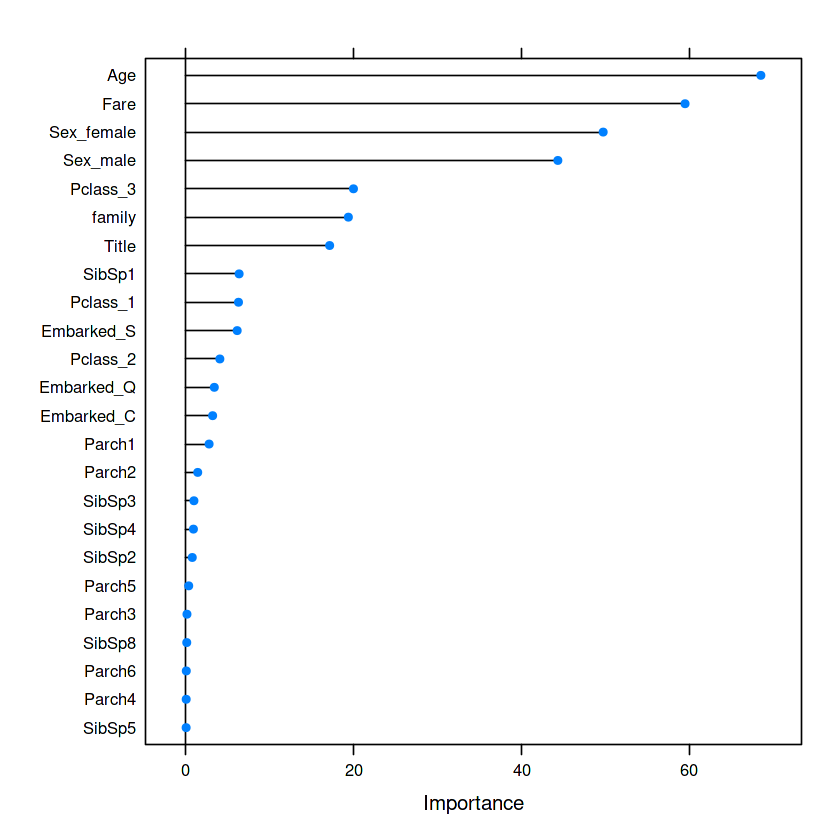

In [37]:
# estimate variable importance
importance <- varImp(fit.rf, scale=FALSE)
# summarize importance
print(importance)
# plot importance
plot(importance)

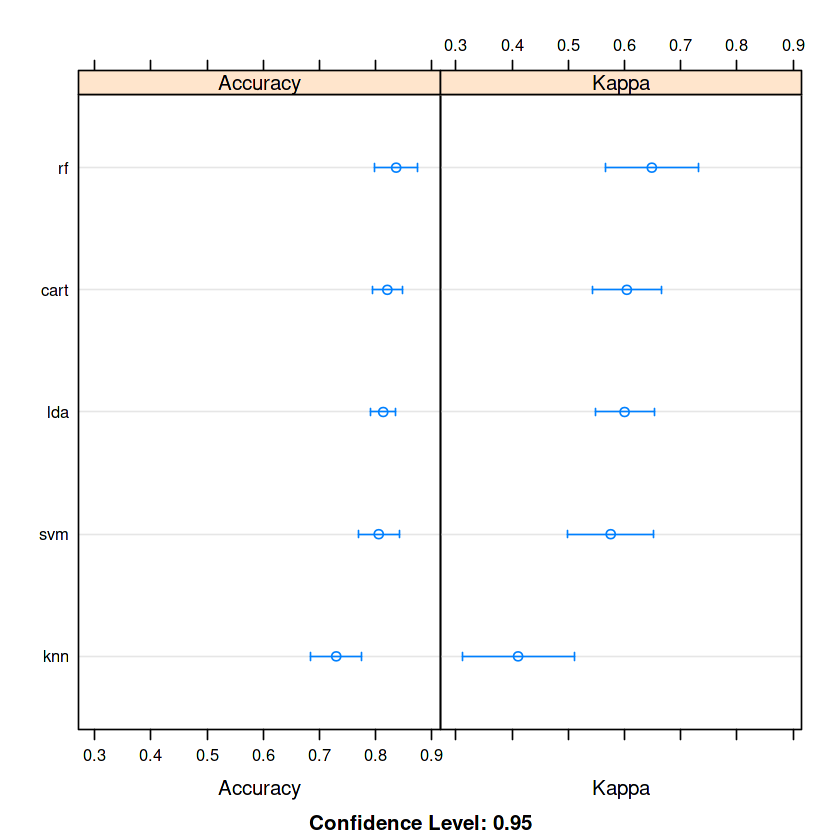

In [38]:
dotplot(results)

In [39]:
print(fit.rf)

Random Forest 

714 samples
 14 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 643, 642, 643, 643, 643, 643, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8179773  0.6005759
  13    0.8363459  0.6487317
  24    0.8279343  0.6316512

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 13.


In [40]:
# head(train$c("Pclass", "Age", "SiSp", "Parch", "Fare"))
head(
  select(train, Pclass, Age, SibSp, Parch, Fare)
)

,Pclass,Age,SibSp,Parch,Fare
,<fct>,<dbl>,<fct>,<fct>,<dbl>
1,3,22,1,0,7.2500
2,1,38,1,0,71.2833
3,3,26,0,0,7.9250
4,1,35,1,0,53.1000
5,3,35,0,0,8.0500
7,1,54,0,0,51.8625


In [41]:
# estimate skill of LDA on the validation dataset
predictions <- predict(fit.rf, validation)
# heatmap(confusionMatrix(predictions, validation$Survived)[2][2])
confusionMatrix(predictions, validation$Survived)[2]

$table
          Reference
Prediction  0  1
         0 97 15
         1 12 53


In [42]:
get_title <- function(train){
    train = mutate(train, family = SibSp + Parch)
    tr1 <- strsplit(train$Name, ",")
    tr1 <- as.data.table(transpose(tr1))
    train[,c("Surname", "FN")] <- tr1

    tr2 <- strsplit(train$FN, "[.]")
    tr2 <- as.data.table(transpose(tr2))
    train[,c("Title", "FullName","Extra")] <- tr2
    train$Title <- as.integer(factor(train$Title))
    
    cat_cols <- c("Sex", "Pclass", "SibSp", "Parch", "Embarked", "Cabin", "Ticket")
    train[cat_cols] <- lapply(train[cat_cols], factor)
    library('fastDummies')
    dum1 <- dummy_cols(train,select_columns =c('Sex', 'Pclass', 'Embarked'))
    drops <- c("Name", "Cabin", "Sex", "Pclass", "PassengerId", "Ticket", "Embarked", "FullName","Extra", "Surname", "FN")
    train_df <- dum1[ , !(names(dum1) %in% drops)]
    
    return(train_df)
}

In [43]:
preds <- predict(fit.rf, get_title(test))

In [44]:
preds

[1] 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1
 [38] 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1
 [75] 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0
[112] 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0
[149] 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0
[186] 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0
[223] 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0
[260] 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1
[297] 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0
Levels: 0 1

In [45]:
table((factor(predictions)))


  0   1 
112  65 